## Import Library dan Load Data 

In [4]:
import pandas as pd

In [5]:
data_train = pd.read_excel('dataset-emosi-twitter-2500.xlsx')
data_test = pd.read_excel('data_test.xlsx')

In [6]:
#untuk melihat banyak data pada data train

data_train.shape

(2500, 2)

In [7]:
#untuk melihat banyak data pada data test

data_test.shape

(267, 2)

In [8]:
#mengambil 5 data teratas pada data train

data_train.head(5)

,LABEL,TEKS
0,terkejut,@indomyfess Seokjin\n\nYah pas kenal Bangtan t...
1,jijik,@JaneeeNoLimit Wkwk. Iri dengki dah
2,sedih,Tadi gue lewat jalan yang aga rame orang juala...
3,jijik,@sunrisingbok LWBSKSN yo igual muak
4,terkejut,@moontygf EMG ANJRIT GUA KAGET GWS BGT NAD<U+0...


In [9]:
#mengambi 5 data terbawah pada data train

data_train.tail(5)

,LABEL,TEKS
2495,jijik,@akukeadilan_ Menyampah tengok mana yg letak s...
2496,terkejut,"main ke kampung seberang, ya Allah takjub, ini..."
2497,terkejut,kdg takle focus tgk cerita sbb ha ramâ€™s visu...
2498,marah,Nangroe Aceh Darussalam memang Istimewa Al Fat...
2499,sedih,nyesek rasanya kenapa kamu setega itu


In [10]:
#mengamnil 5 data secara acak pada data train

data_train.sample(5)

,LABEL,TEKS
2048,marah,Positif thinking aja..susu kental manis ga ada...
975,marah,Pencitraan terbesar kampus itu ketika mau akre...
119,terkejut,[Askrl] gais aku masih heran kok dokter bisa t...
1777,senang,wanita yang paling malang di dunia adalah wani...
757,sedih,Sayang banget ketika ada film lokal yang bagus...


In [11]:
#deskripsi data pada data train

data_train.describe()

,LABEL,TEKS
count,2500,2500
unique,6,2477
top,terkejut,Knp sih masyarakat Indonesia itu ngeyel bgt ka...
freq,723,4


In [12]:
#melihat kolom pada data train

data_train.columns

Index(['LABEL', 'TEKS'], dtype='object')

In [13]:
#menghitung jumlah variabel pada kolom tweets
data_train['TEKS'].value_counts()

Knp sih masyarakat Indonesia itu ngeyel bgt kalo dikasih tau. Ngerti ga sih yg namanya "dirumah aj" ? Anda tuh disuruh stay dirumah ama pemerintah, bukan dikasih libur/cuti. Knp harus dirumah? Knp ga boleh keluar? Karena covid-19 sedang menyerang Indonesia.    4
Tak ada orang yang senang dengan\nkekalahan.\nAku merasa dongkol kalau kalah.\nTapi, bagiku kekalahan dan luka bukanlah\nakhir dari s ##Bot                                                                                                                          2
paling ngeselin kalau driver udah bilang mbak yang cancel ya tapi jangan centang yang driver asked to cancel jangan ajar                                                                                                                                             2
Serasa bangga n tepat, memilih sekolah untuk Si Kecil yg tegas memberi statement bahwa akan terus menggunakan #Kurikulum2013 SDM GKB2 Gresik                                                                       

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

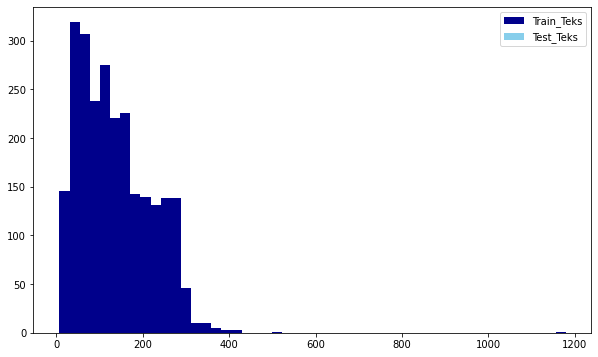

In [15]:
#melihat panjang tweet dalam data train dan data test

length_train = data_train['TEKS'].str.len()
length_test = data_test['LABEL'].str.len()
plt.figure(figsize=(10,6))
plt.hist(length_train, bins=50, label="Train_Teks", color = "darkblue")
plt.hist(length_test, bins=50, label='Test_Teks', color = "skyblue")
plt.legend()

### Membuat train_test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X=data_train.LABEL
y=data_train.TEKS

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=225)

In [19]:
#melihat pembagian data di x_train, x_test, y_train dan y_test

print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))



Banyak data x_train : 2250
Banyak data x_test  : 250
Banyak data y_train : 2250
Banyak data y_test  : 250


## Preprocessing

Pada tahap ini yang dilakukan adalah membuat data yang ada menjadi data yang lebih berkualitas atau lebih baik, dikarenakan pada data mentah masih ada yang mengandung agregat data, noisy data yang masih mengandung error dan outliers, serta ada nya data yang tidak konsisten.

In [20]:
import re

In [21]:
pip install -U beautifulsoup4

     |████████████████████████████████| 97 kB 3.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [22]:
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
import numpy as np

In [23]:
def proses_teks(teks):
    soup = BeautifulSoup(teks, 'lxml')
    souped = soup.get_text()
    try:
        teks = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        teks = souped
    teks_bersih= re.sub("[^a-zA-Z0-9]", " ",(re.sub(www_pat, '', re.sub(combined_pat, '', teks)).lower()))
    teks_bersih= ' '.join([word for word in teks_bersih.split() if word not in stopword_user])
    return (" ".join([x for x in tok.tokenize(teks_bersih) if len(x) > 1])).strip()

In [24]:
merge = data_train.append(data_test, ignore_index=True, sort=False)
merge.shape

(2767, 2)

In [25]:
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9_]+' #menghilangkat username
pat2 = r'https?://[^ ]+' #menghilangkan situs website
combined_pat = r'|'.join((pat1, pat2)) #join pat1 dan pat 2
www_pat = r'www.[^ ]+' #menghilangkan situs website

In [26]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

merge['clean_teks'] = np.vectorize(remove_pattern)(merge['TEKS'], "@[\w]*") #menghilangkan @user
merge['clean_teks'] = merge['clean_teks'].str.replace("[^a-zA-Z#]", " ") #menghilangkan punctuation, angka, dan karakter
merge['clean_teks'] = merge['clean_teks'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) #menghapus kata pendek

In [27]:
merge.head(5)

,LABEL,TEKS,clean_teks
0,terkejut,@indomyfess Seokjin\n\nYah pas kenal Bangtan t...,Seokjin kenal Bangtan tiba lihat seokjin jadi ...
1,jijik,@JaneeeNoLimit Wkwk. Iri dengki dah,Wkwk dengki
2,sedih,Tadi gue lewat jalan yang aga rame orang juala...,Tadi lewat jalan yang rame orang jualan liat d...
3,jijik,@sunrisingbok LWBSKSN yo igual muak,LWBSKSN igual muak
4,terkejut,@moontygf EMG ANJRIT GUA KAGET GWS BGT NAD<U+0...,ANJRIT KAGET


### Tokenization

Tahap ini merupakan proses memecah dokumen yang terdiri dari sekumpulan kalimat menjadi bagian-bagian kata yang disebut dengan token

In [28]:
tokenized_tweet = merge['clean_teks'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Seokjin, kenal, Bangtan, tiba, lihat, seokjin...
1                                       [Wkwk, dengki]
2    [Tadi, lewat, jalan, yang, rame, orang, jualan...
3                               [LWBSKSN, igual, muak]
4                                      [ANJRIT, KAGET]
Name: clean_teks, dtype: object

### Stemming

Tahap ini merupakan mantransformasi kata menjadi kata dasar dengan menghilangkan imbuhan kata

In [29]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet.head()

0    [seokjin, kenal, bangtan, tiba, lihat, seokjin...
1                                       [wkwk, dengki]
2    [tadi, lewat, jalan, yang, rame, orang, jualan...
3                               [lwbsksn, igual, muak]
4                                      [anjrit, kaget]
Name: clean_teks, dtype: object

### Transformation

In [30]:
#menambahkan tweet yang sudah bersih ke dalam data frame

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
merge['clean_tweet'] = tokenized_tweet
merge.head()

,LABEL,TEKS,clean_teks,clean_tweet
0,terkejut,@indomyfess Seokjin\n\nYah pas kenal Bangtan t...,Seokjin kenal Bangtan tiba lihat seokjin jadi ...,seokjin kenal bangtan tiba lihat seokjin jadi ...
1,jijik,@JaneeeNoLimit Wkwk. Iri dengki dah,Wkwk dengki,wkwk dengki
2,sedih,Tadi gue lewat jalan yang aga rame orang juala...,Tadi lewat jalan yang rame orang jualan liat d...,tadi lewat jalan yang rame orang jualan liat d...
3,jijik,@sunrisingbok LWBSKSN yo igual muak,LWBSKSN igual muak,lwbsksn igual muak
4,terkejut,@moontygf EMG ANJRIT GUA KAGET GWS BGT NAD<U+0...,ANJRIT KAGET,anjrit kaget


### Visualiasasi dengan data yang sudah bersih, dengan menggunakan Word Cloud

In [31]:
#untuk melihat sentimen yang ada pada seluruh data train. Dapat dilihat dengan memahami kata yang umum dengan plot word cloud

from wordcloud import WordCloud
def plot_wordCloud(words):
    wordCloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=120).generate(words)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')

## Extracting Features

### Bag-of-words

Bag of word merupakan representasi penyederhanaan yang digunakan dalam NLP. Dalam model ini, direpresentasi sebagai bag (multiset) kata-katanya, mengabaikan tata bahasa dan urutan kata tetapi tetap berkembang

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(merge['clean_teks'])

### TF_IDF

TF-IDF atau Term Frequency-Inverse Document Frequency, merupakan proses pemberian bobot term pada dokumen. Pembobotan ini dogunakan untuk melakukan klasifikasi data.

In [33]:
tfidf_vectorizer = CountVectorizer(max_df=0.90, max_features=1000, stop_words='english')
tfidf = bow_vectorizer.fit_transform(merge['clean_teks'])

### Word2vec

Word2vec adalah metode embedding word yang berguna untuk mempresentasikan kata menjadi sebuah vektor dengan panjang N. 

In [34]:
tokenized_tweet = merge['clean_teks'].apply(lambda x: x.split()) #tokenize

import gensim
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200,
            window = 5, #ukuran jendela
            min_count =2,
            sg = 1, #skip gram model
            hs = 0,
            negative = 10, #jumlah contoh kata negatif
            workers = 2,
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(merge['clean_teks']), epochs=20)

(611576, 807100)

In [35]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # apabila ada kasus dimana token tidak ada dalam kosa kata
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [36]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(2767, 200)

## Classification SVM

#### Support Vector Machine (SVM)

SVM merupakan salah satu metode klasifikasi dengan menemukan hyperplance yang membedakan dua kelas dengan baik. Teknik ini digunakan untuk mentranformasikan data dan kemudian menemukan batas optimal.

Bag-of-words

In [37]:
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [45]:
train_bow = bow[:319620,:]
test_bow = bow[319620:,:]

#ganti data ke training dan validasi set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, data_train['LABEL'], random_state=42, test_size=0.4)


NameError: ignored

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)

prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
F1_Score = f1_score(yvalid, prediction_int) #menghitung f1-score
print('Precision score: ', precision_score(yvalid, prediction_int, average=None)) #menghitung precision score
print('Accuracy Score: ', accuracy_score(yvalid, prediction_int)) #menghitung accuracy score
print(f'F1_Score: {F1_Score}')

TF-IDF

In [ ]:
train_tfidf = bow[:31962,:]
test_tfidf = bow[31962:,:]

#ganti data ke training dan validasi set
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_tfidf, data_train['label'], random_state=42, test_size=0.5)


In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)

prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
F1_Score = f1_score(yvalid, prediction_int) #menghitung f1-score
print('Precision score: ', precision_score(yvalid, prediction_int, average=None)) #menghitung precision_score
print('Accuracy Score: ', accuracy_score(yvalid, prediction_int)) #menghitung accuracy score
print(f'F1_Score: {F1_Score}')

Word2Vec

In [ ]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)

prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
F1_Score = f1_score(yvalid, prediction_int) # menghitung f1 score
print('Precision score: ', precision_score(yvalid, prediction_int, average=None)) #menghitung precision score
print('Accuracy Score: ', accuracy_score(yvalid, prediction_int)) #menghitung accuracy score
print(f'F1_Score: {F1_Score}')

## Evaluation

In [ ]:
MODEL_ID = []
Accuracy = []
LOG_CV_ERR = []
F1Score = []
def calculate_log_cv_error(logmodel,X_train,y_train):
    ms_errors= cross_val_score(logmodel, X_train, y_train, cv=5, scoring = make_scorer(mean_squared_error))
    rms_errors = np.sqrt(ms_errors)
    mean_rms_error = rms_errors.mean()
    return mean_rms_error

In [ ]:
def evaluate_model(logmodel,X_train,X_test,y_train,y_test,predictions):
    log_cv_error = calculate_log_cv_error(logmodel,X_train,y_train)
    print(f'\nClassification Report:\n{classification_report(y_test,predictions)}')
    print('')
    print(f'\nConfusion Matrix:\n{confusion_matrix(y_test,predictions)}')
    print('')
    print (f'\nAccuracy Score:  {accuracy_score(y_test,predictions)}')
    print("Cross Validation Error: ",log_cv_error)
    logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
    LOG_CV_ERR.append(log_cv_error)
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
evaluate_model(svc,xtrain_w2v,xvalid_w2v,ytrain,yvalid,prediction_int)
MODEL_ID.append('Support Vector Classifier')
Accuracy.append(accuracy_score(yvalid, prediction_int))
F1Score.append(f1_score(yvalid, prediction_int))

SVM bekerja sangat baik dengan batas pemisah yang jelas pada dua karakteristik dan ruang berdimensi yang tinggi.